In [4]:
import pandas as pd
app=pd.read_csv("Downloads/appstore_games.csv")
print("The Original Data Set Description\n")
print(app.describe().astype(int))   #describing the file(mean,std deviation)
print("Null value Analysis for data cleansing\n")
print(app.isnull().sum())                        #counting null values in each column


The Original Data Set Description

               ID  Average User Rating  User Rating Count  Price        Size
count       17007                 7561               7561  16983       17006
mean   1059613815                    4               3306      0   115706429
std     299967589                    0              42322      7   203647677
min     284921427                    1                  5      0       51328
25%     899654330                    3                 12      0    22950144
50%    1112286228                    4                 46      0    56768954
75%    1286982837                    4                309      0   133027072
max    1475076711                    5            3032734    179 -2147483648
Null value Analysis for data cleansing

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User

In [5]:
import numpy as np
app1=app.dropna(subset=['Average User Rating'])

app1['In-app Purchases']=app1['In-app Purchases'].str.replace(',','')
app1['In-app Purchases']=app1['In-app Purchases'].fillna(0)
for x in list(app1.index.values):
    if app1['In-app Purchases'][x]!=0:
        mn=str.split(app1['In-app Purchases'][x])
        mn=[float(i) for i in mn]
        app1['In-app Purchases'][x]=np.mean(mn)
app1['Price']=app1['Price']+app1['In-app Purchases']
app1.drop(['Description','In-app Purchases'],axis=1,inplace=True)
print(app1.describe())
app1['Genres']=app1['Genres'].str.replace('Games','').str.replace('Entertainment','').str.replace(',','')

#Distinguishing various Genres
app1.loc[app1['Genres'].str.contains('Puzzle'),'Genres']='Puzzle'
app1.loc[app1['Genres'].str.contains('Board'),'Genres']='Board'
app1.loc[app1['Genres'].str.contains('Casual'),'Genres']='Puzzle'
app1.loc[app1['Genres'].str.contains('Card'),'Genres']='Board'
app1.loc[app1['Genres'].str.contains('Action'),'Genres']='Action'
app1.loc[app1['Genres'].str.contains('Simulation'),'Genres']='Action'
app1.loc[app1['Genres'].str.contains('Word'),'Genres']='Word'
app1.loc[app1['Genres'].str.contains('Role Playing'),'Genres']='Action'
app1.loc[app1['Genres'].str.contains('Adventure'),'Genres']='Action'
app1.loc[app1['Genres'].str.contains('Education'),'Genres']='Family'
app1.loc[app1['Genres'].str.contains('Family'),'Genres']='Family'
app1.loc[app1['Genres'].str.contains('Casino'),'Genres']='Family'
app1.loc[app1['Genres'].str.contains('Puzzle'),'Primary Genre']='Pri'
app1.loc[app1['Genres'].str.contains('Board'),'Primary Genre']='Pri'
app1.loc[app1['Genres'].str.contains('Action'),'Primary Genre']='Pri'

#count of Primary Genres
print("Count of Primary Genres:",(app1['Primary Genre']=='Pri').sum())
#Distrbution of primary genres
print("Distribution of Genre \'Puzzle\':",(app1['Genres']=='Puzzle').sum())
print("Distribution of Genre \'Board\':",(app1['Genres']=='Board').sum())
print("Distribution of Genre \'Action\':",(app1['Genres']=='Action').sum())
print("Distribution of Genre \'Family\':",(app1['Genres']=='Family').sum())
print("Distribution of Genre \'Word\':",(app1['Genres']=='Word').sum())
a=(app1['Genres']=='Family').sum()
b=(app1['Genres']=='Word').sum()

app2=app1[app1['Genres']=='Puzzle']
app3=app1[app1['Genres']=='Board']
app4=app1[app1['Genres']=='Action']
print("Analysis of Genre \'Puzzle':\n",app2.describe().astype(int))
print()
print("Analysis of Genre \'Board':\n",app3.describe().astype(int))
print()
print("Analysis of Genre \'Action':\n",app4.describe().astype(int))

C:\Users\Harshini\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Harshini\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Harshini\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

                 ID  Average User Rating  User Rating Count          Size
count  7.561000e+03          7561.000000       7.561000e+03  7.561000e+03
mean   9.443312e+08             4.060905       3.306531e+03  1.514679e+08
std    3.334220e+08             0.751428       4.232256e+04  2.550380e+08
min    2.849214e+08             1.000000       5.000000e+00  2.158400e+05
25%    6.463627e+08             3.500000       1.200000e+01  3.061862e+07
50%    9.801324e+08             4.500000       4.600000e+01  7.964672e+07
75%    1.211827e+09             4.500000       3.090000e+02  1.776138e+08
max    1.474461e+09             5.000000       3.032734e+06  4.005591e+09
Count of Primary Genres: 6543
Distribution of Genre 'Puzzle': 1895
Distribution of Genre 'Board': 1224
Distribution of Genre 'Action': 3424
Distribution of Genre 'Family': 378
Distribution of Genre 'Word': 48
Analysis of Genre 'Puzzle':
                ID  Average User Rating  User Rating Count        Size
count        1895         

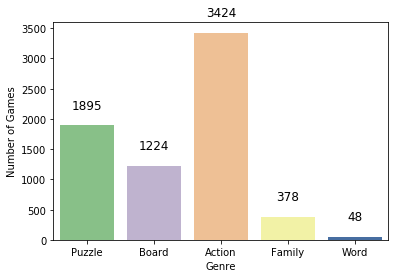

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#Histogram
x=['Puzzle','Board','Action','Family','Word']
y=[len(app2),len(app3),len(app4),a,b]
vis=sns.barplot(x,y,palette='Accent')
vis.set(xlabel='Genre',ylabel='Number of Games')
for p in vis.patches:
    vis.annotate("%.f" %p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center',va='center',fontsize=12,color='black',xytext=(0,20),textcoords='offset points')

#Dropping less significant genres
app1=app1[app1['Primary Genre']=='Pri']


The classification of the games into three major 'significant' Genres has led to the conclusion:
The count of "Action" games is significantly greater than those belonging to genres "Puzzle", "Board", "Family" and "Word"

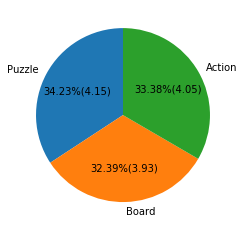

In [116]:
x=['Puzzle','Board','Action']
y=[app2['Average User Rating'].mean(),app3['Average User Rating'].mean(),app4['Average User Rating'].mean()]
plt.pie(y,labels=x,startangle=90,autopct=lambda p: '{:.2f}%({:.2f})'.format(p,p/100*sum(y)))
plt.show()

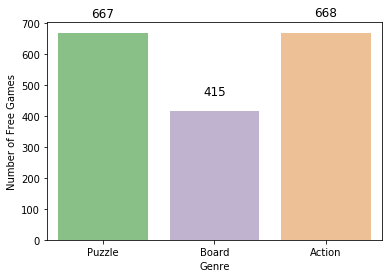

In [117]:
x=['Puzzle','Board','Action']
y=[len(app2[app2['Price']==0]),len(app3[app3['Price']==0]),len(app4[app4['Price']==0])]
vis=sns.barplot(x,y,palette='Accent')
vis.set(xlabel='Genre',ylabel='Number of Free Games')
for p in vis.patches:
    vis.annotate("%.f" %p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center',va='center',fontsize=12,color='black',xytext=(0,20),textcoords='offset points')




On Comparing Paid and Free Games, we see that more number of users are towards Paid games than those which are free. We also see that the count of paid 'Action' games is a lot higher that the other games.

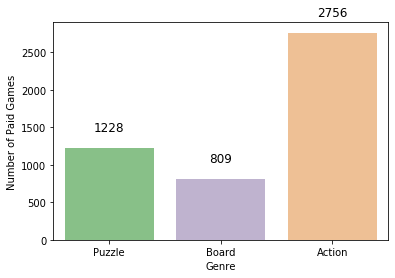

In [118]:
x=['Puzzle','Board','Action']
y=[len(app2[app2['Price']>0]),len(app3[app3['Price']>0]),len(app4[app4['Price']>0])]
vis=sns.barplot(x,y,palette='Accent')
vis.set(xlabel='Genre',ylabel='Number of Paid Games')
for p in vis.patches:
    vis.annotate("%.f" %p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center',va='center',fontsize=12,color='black',xytext=(0,20),textcoords='offset points')


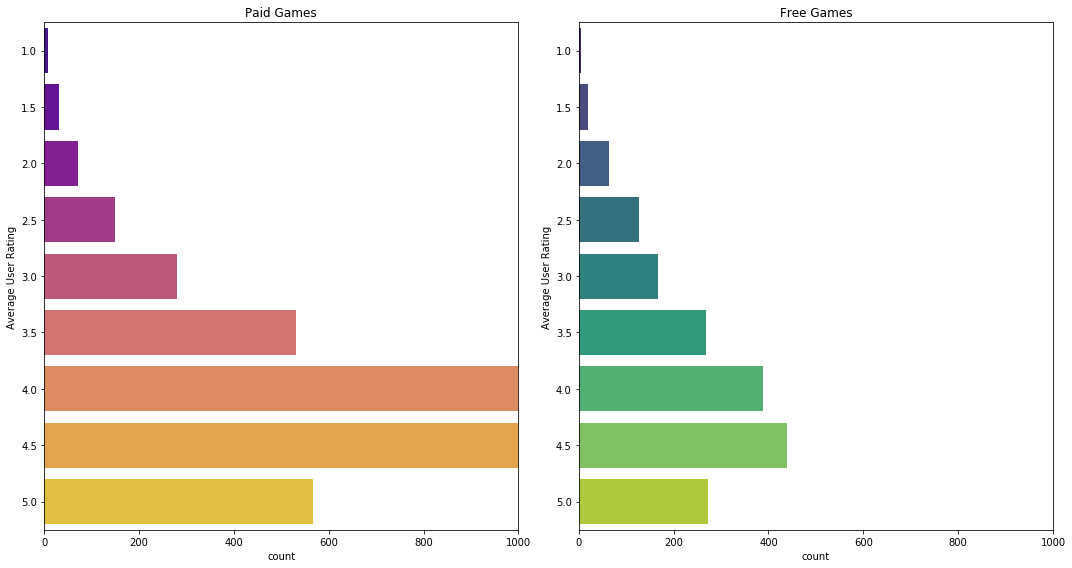

In [119]:
paid = app1[app1['Price']>0]
free = app1[app1['Price']==0]
fig, ax = plt.subplots(1, 2, figsize=(15,8))
sns.countplot(data=paid, y='Average User Rating', ax=ax[0], palette='plasma')
ax[0].set_title('Paid Games')
ax[0].set_xlim([0, 1000])

sns.countplot(data=free, y='Average User Rating', ax=ax[1], palette='viridis')
ax[1].set_title('Free Games')
ax[1].set_xlim([0,1000])
plt.tight_layout();
plt.show()

In terms Of User Rating Vs Price, we see that the paid games have a greater welcome among players as about 2700 games have rating between 4 and 5 which is about twice the number of free games with ratings in the range 4-5

CONCLUSION:
Thus there is a greater scope for Paid, 'Action' genre games mostly of size 100 mega bytes to get a good user rating of 4.0 to 5.0